In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-3/submission.csv
/kaggle/input/covid19-global-forecasting-week-3/test.csv
/kaggle/input/covid19-global-forecasting-week-3/train.csv


**Loading Total Data**

In [2]:
train=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-3/train.csv')

In [3]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


**Seperate Bangladesh Data**

In [4]:
bd=train[(train.Country_Region=='Bangladesh')]
bd

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
1540,2141,NaN,Bangladesh,2020-01-22,0.0,0.0
1541,2142,NaN,Bangladesh,2020-01-23,0.0,0.0
1542,2143,NaN,Bangladesh,2020-01-24,0.0,0.0
1543,2144,NaN,Bangladesh,2020-01-25,0.0,0.0
1544,2145,NaN,Bangladesh,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
1612,2213,NaN,Bangladesh,2020-04-03,61.0,6.0
1613,2214,NaN,Bangladesh,2020-04-04,70.0,8.0
1614,2215,NaN,Bangladesh,2020-04-05,88.0,9.0
1615,2216,NaN,Bangladesh,2020-04-06,123.0,12.0


**Confirmed Cases Forecasting**

In [5]:
bd_cc=bd[['Date','ConfirmedCases']]

In [6]:
bd_cc['ds']=bd_cc['Date']
bd_cc['y']=bd_cc['ConfirmedCases']
bd_cc.drop(columns=['Date','ConfirmedCases'], inplace=True)
bd_cc.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_

,ds,y
1540,2020-01-22,0.0
1541,2020-01-23,0.0
1542,2020-01-24,0.0
1543,2020-01-25,0.0
1544,2020-01-26,0.0


In [7]:
from fbprophet import Prophet
model_cc=Prophet()
model_cc.fit(bd_cc)

In [8]:
future = model_cc.make_future_dataframe(periods=100)
future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [9]:
forecast=model_cc.predict(future)
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-2.214863,-16.109287,9.031436,-2.214863,-2.214863,-1.637517,-1.637517,-1.637517,-1.637517,-1.637517,-1.637517,0.0,0.0,0.0,-3.852380
1,2020-01-23,-2.113396,-16.703962,9.438245,-2.113396,-2.113396,-1.818866,-1.818866,-1.818866,-1.818866,-1.818866,-1.818866,0.0,0.0,0.0,-3.932262
2,2020-01-24,-2.011928,-17.228258,9.197115,-2.011928,-2.011928,-1.843288,-1.843288,-1.843288,-1.843288,-1.843288,-1.843288,0.0,0.0,0.0,-3.855216
3,2020-01-25,-1.910461,-16.641546,9.401700,-1.910461,-1.910461,-1.686037,-1.686037,-1.686037,-1.686037,-1.686037,-1.686037,0.0,0.0,0.0,-3.596497
4,2020-01-26,-1.808993,-15.214622,10.214257,-1.808993,-1.808993,-0.528771,-0.528771,-0.528771,-0.528771,-0.528771,-0.528771,0.0,0.0,0.0,-2.337764


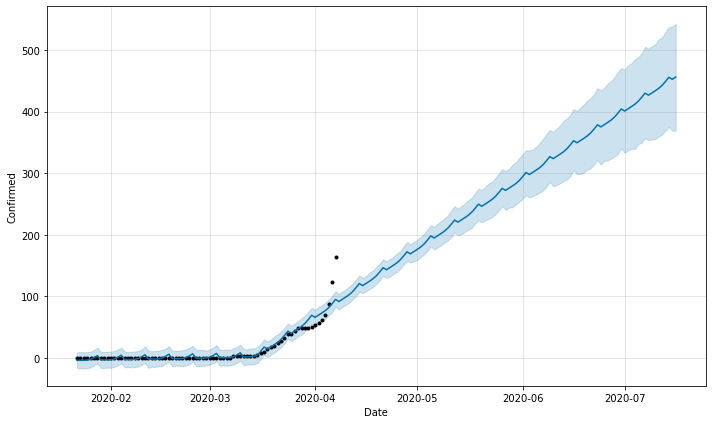

In [10]:
fig_Confirmed = model_cc.plot(forecast,xlabel = "Date",ylabel = "Confirmed")

**Fatalities Forecasting**

In [11]:
bd_ft=bd[['Date','Fatalities']]
bd_ft['ds']=bd_ft['Date']
bd_ft['y']=bd_ft['Fatalities']
bd_ft.drop(columns=['Date','Fatalities'], inplace=True)
bd_ft.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,ds,y
1540,2020-01-22,0.0
1541,2020-01-23,0.0
1542,2020-01-24,0.0
1543,2020-01-25,0.0
1544,2020-01-26,0.0


In [12]:
from fbprophet import Prophet
model_ft=Prophet()
model_ft.fit(bd_ft)

In [13]:
future = model_ft.make_future_dataframe(periods=100)

In [14]:
forecast=model_ft.predict(future)

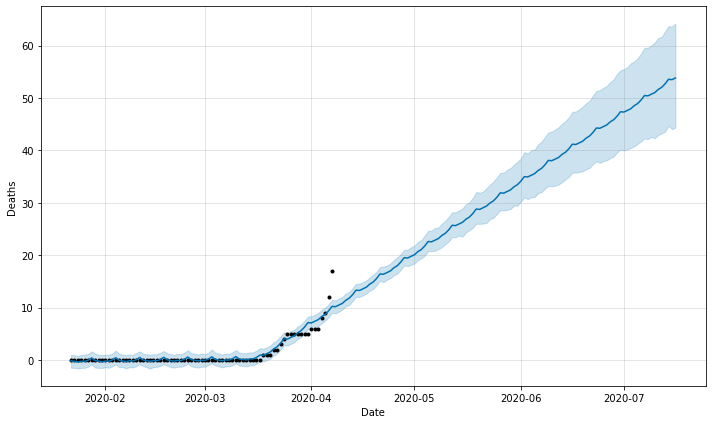

In [15]:
fig_Fatalities = model_ft.plot(forecast,xlabel = "Date",ylabel = "Deaths")